In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

rf= pd.DataFrame(data)

rf


,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


The pd.DataFrame() method in pandas is used to create a DataFrame, which is a 2-dimensional labeled data structure (like a table or spreadsheet).

 The data to convert into a DataFrame. It can be:

A dictionary of lists or arrays (like in your example)

A 2D numpy array

A list of dictionaries

A pandas Series or another DataFrame

<Axes: xlabel='job_skills'>

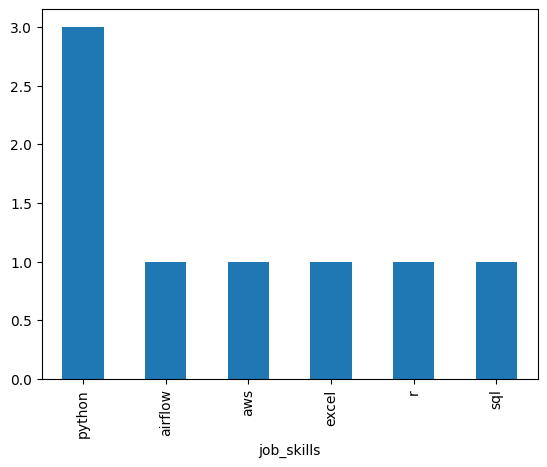

In [2]:
rf.explode("job_skills")

rf.explode("job_skills").value_counts("job_skills").plot(kind="bar")

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")
rf["date"] = pd.to_datetime(rf["date"])

import ast

rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)


rf["skills_list"][3]
# type(rf["skills_list"][3]


['Probability', 'SAS', 'Regression']

In [5]:
"""let's now run the explode mothod on it """

rf.explode("skills_list")

rf_exploded = rf.explode("skills_list")
rf.explode("skills_list")

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,num_of_jobs,job_title,skills_list,job__health_insurance,work_from_home
0,E09000001,city of london,1999-12-12,33020.0,NaN,48922.0,0.0,6581.0,122000.0,Operations Analyst,SQL,True,False
0,E09000001,city of london,1999-12-12,33020.0,NaN,48922.0,0.0,6581.0,122000.0,Operations Analyst,Business Intelligence,True,False
0,E09000001,city of london,1999-12-12,33020.0,NaN,48922.0,0.0,6581.0,122000.0,Operations Analyst,Dashboarding,True,False
1,E09000002,barking and dagenham,1999-01-11,21480.0,NaN,23620.0,3.0,162444.0,115000.0,Database Administrator,Data Recovery,False,True
1,E09000002,barking and dagenham,1999-01-11,21480.0,NaN,23620.0,3.0,162444.0,115000.0,Database Administrator,Security,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,K02000001,united kingdom,1999-02-12,17803.0,NaN,21315.0,NaN,58684427.0,NaN,Statistician,SAS,True,False
24,K02000001,united kingdom,1999-02-12,17803.0,NaN,21315.0,NaN,58684427.0,NaN,Statistician,Regression,True,False
25,E09000005,brent,1999-09-12,18532.0,NaN,20911.0,7.0,260317.0,134000.0,Database Administrator,MySQL,False,True
25,E09000005,brent,1999-09-12,18532.0,NaN,20911.0,7.0,260317.0,134000.0,Database Administrator,Oracle,False,True


<Axes: xlabel='skills_list'>

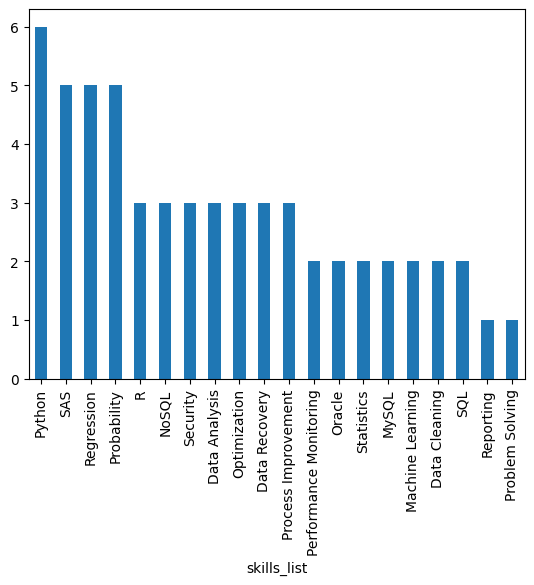

In [6]:
 rf_exploded.value_counts("skills_list").head(20).plot(kind="bar")

In [11]:
rf_exploded.groupby(["job_title","skills_list"]).size()

skills_count = rf_exploded.groupby(["job_title","skills_list"]).size()

type(skills_count)

"""let's now convert it into dataframes"""
skills_count

job_title               skills_list           
Database Administrator  Automation                1
                        Backup Management         1
                        Data Integrity            1
                        Data Recovery             3
                        Database Tuning           1
                        MySQL                     2
                        NoSQL                     3
                        Oracle                    2
                        Performance Monitoring    2
                        PostgreSQL                1
                        SQL                       1
                        Security                  3
Operations Analyst      Business Intelligence     1
                        Communication             1
                        Dashboarding              1
                        Excel                     1
                        KPIs                      1
                        Operations Research       1
                 

In [13]:
dataf = skills_count.reset_index()
dataf = skills_count.reset_index(name="skills_count")
dataf
"""the name=skills_count argument renames the column that is created from the Series values when converting it into a DataFrame."""
dataf


,job_title,skills_list,skills_count
0,Database Administrator,Automation,1
1,Database Administrator,Backup Management,1
2,Database Administrator,Data Integrity,1
3,Database Administrator,Data Recovery,3
4,Database Administrator,Database Tuning,1
5,Database Administrator,MySQL,2
6,Database Administrator,NoSQL,3
7,Database Administrator,Oracle,2
8,Database Administrator,Performance Monitoring,2
9,Database Administrator,PostgreSQL,1


<Axes: ylabel='skills_list'>

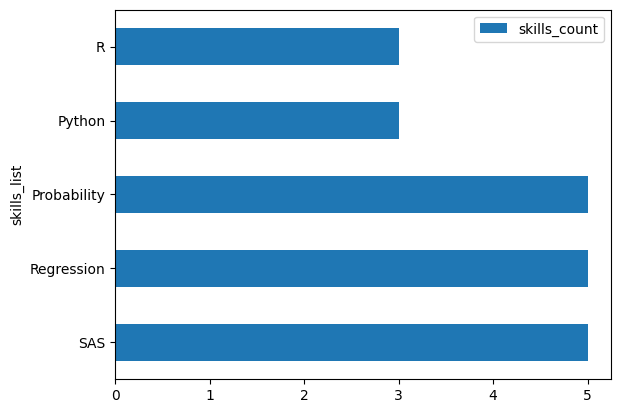

In [14]:
"""let's now sort it"""

dataf= dataf.sort_values(by="skills_count", ascending=False)
dataf

job_title23 = "Statistician"
top_skills = 5

final_step = dataf[dataf["job_title"] == job_title23].head(top_skills)
final_step
final_step.plot(kind="barh", x = "skills_list", y="skills_count")